In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set();

In [77]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [78]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [79]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [80]:
print(train.shape, test.shape)

(7613, 5) (3263, 4)


In [81]:
train.target.nunique()

2

In [82]:
train.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [83]:
train=train[['text', 'target']]

In [84]:
train=train.rename(columns={'target':'sentiment'})

In [85]:
train.head()

,text,sentiment
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [86]:
test=test['text']
test.head()

0                   Just happened a terrible car crash
1    Heard about #earthquake is different cities, s...
2    there is a forest fire at spot pond, geese are...
3             Apocalypse lighting. #Spokane #wildfires
4        Typhoon Soudelor kills 28 in China and Taiwan
Name: text, dtype: object

In [28]:
train.isnull().sum()

text         0
sentiment    0
dtype: int64

In [29]:
test.isnull().sum()

0

In [30]:
train.sentiment.unique()

array([1, 0], dtype=int64)

In [32]:
train.groupby('sentiment').count()

,text
sentiment,
0,4342
1,3271


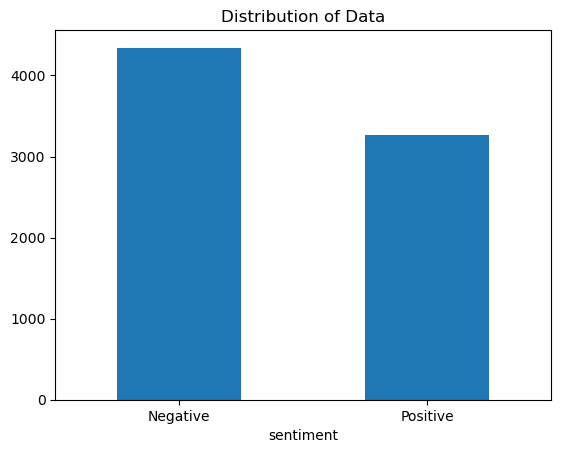

In [34]:
#visualize the distribution in the train dataset:
ax=train.groupby('sentiment').count().plot(kind='bar', title="Distribution of Data",
                                       legend=False)

#naming the xticklabels
ax.set_xticklabels(['Negative','Positive'], rotation=0)

#store the data in a list
text, sentiment=list(train['text']), list(train['sentiment'])

In [87]:
train['sentiment'].value_counts().sort_index()

0    4342
1    3271
Name: sentiment, dtype: int64

In [101]:
# importing the relevant packages
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

stop_words = stopwords.words('english')
wnl = WordNetLemmatizer() 

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    #text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    
    return text

In [102]:
train['clean_tweet']=train['text'].apply(clean_text)
train.head()

,text,sentiment,clean_tweet
0,Our Deeds are the Reason of this #earthquake M...,1,deeds reason #earthquake may allah forgive us
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada
2,All residents asked to 'shelter in place' are ...,1,residents asked 'shelter place' notified offic...
3,"13,000 people receive #wildfires evacuation or...",1,", people receive #wildfires evacuation orders ..."
4,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby #alaska smoke #wildfires p...


In [66]:
from sklearn.feature_extraction.text import CountVectorizer

#vectorize the sentences
cv=CountVectorizer(binary=True)#idicates if the word is present or not
cv.fit(train['text'])

train_x=cv.transform(train['text'])
test_x=cv.transform(test)

In [67]:
import xgboost as xgb

#create a DMatrix
xgb_train=xgb.DMatrix(train_x, train['sentiment'])
xgb_test=xgb.DMatrix(test_x)

In [68]:
#set the paramseters of the model
params={'eta':0.75,
       'max_depth':50,
       'objective':'binary:logitraw'}
#Train the model
xgb_model=xgb.train(params, xgb_train, num_boost_round=50)

#predict using the created model
y_pred=xgb_model.predict(xgb_test)

In [69]:
from sklearn.metrics import accuracy_score, f1_score

accuracy_score(test, y_pred)


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [56]:
f1_score(test, y_pred)

ValueError: Mix of label input types (string and number)

In [57]:
from wordcloud import WordCloud

In [75]:
data_neg=preprocess(train['text'], train['sentiment']== 0)
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=200, width=1600, height=800, collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

TypeError: preprocess() takes 1 positional argument but 2 were given